In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [37]:
current_path = os.getcwd()
current_path_list = current_path.split('/')[:-2]
current_path = '/'.join(current_path_list)
current_path

NameError: name '__file__' is not defined

In [28]:
# need to specify datatype on import!

# base = '/Users/sahara/Documents/GW/DataMining/Final-Project-Group2'
base = current_path

ratings = pd.read_csv(f'{base}/data/IMDb ratings.csv')
movies = pd.read_csv(f'{base}/data/IMDb movies.csv')
names = pd.read_csv(f'{base}/data/IMDb names.csv')
inflation = pd.read_csv(f'{base}/data/CPIAUCNS_inflation.csv')



In [29]:
def clean_budget(x):
    if type(x) == float:
        return np.nan
    white = x.find(' ')
    trimmed = x[white+1:]
    return int(trimmed)
def get_primary_country(x):
    if type(x) == float:
        return np.nan
    return x[0]

In [30]:
#titles = pd.read_csv('data/IMDb title_principals.csv') --- dont need this table
movies['year'] = movies['year'].replace('TV Movie 2019', 2019)

# Merging Ratings and Movies (it merges perfectly)
movies_full = movies.merge(ratings, on = 'imdb_title_id')

movies_full.to_csv(index=False)

# cleaning the inflation data set a bit
inflation['multiplier'] = inflation['CPIAUCNS'].iloc[-1] / inflation['CPIAUCNS']
inflation['DATE'] = pd.to_datetime(inflation['DATE'])
inflation['year'] = inflation['DATE'].apply(lambda x: x.year)
inflation_simple = inflation.drop_duplicates(subset = 'year', keep = 'first')

movies_full = pd.merge(movies_full, inflation_simple, on = ['year'])

movies_full[['genre1', 'genre2', 'genre3']] = movies_full['genre'].str.split(', ', 2, expand = True)
movies_full['worlwide_gross_income'] = movies_full['worlwide_gross_income'].apply(clean_budget)


In [27]:
movies_full['income']

KeyError: 'income'

In [31]:
US_movies = movies_full[movies_full['country'] == 'USA']
US_movies = US_movies[US_movies['budget'].isna() == False]
US_movies['budget'] = US_movies['budget'].apply(clean_budget)
US_movies['budget_adjusted'] = US_movies['budget'] * US_movies['multiplier']

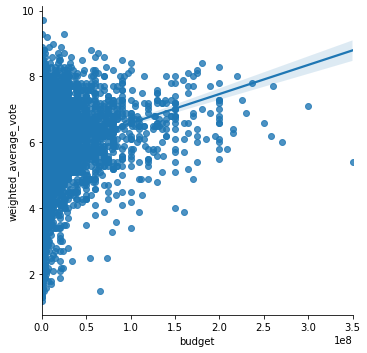

In [32]:
sns.lmplot(data = US_movies, x = 'budget', y = 'weighted_average_vote')

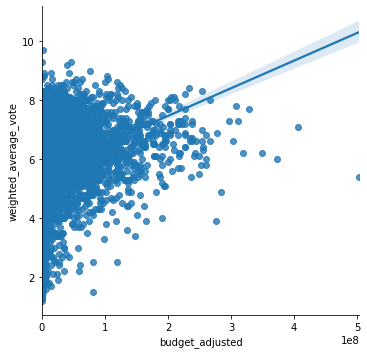

In [33]:
sns.lmplot(data = US_movies, x = 'budget_adjusted', y = 'weighted_average_vote')

In [34]:
movies_full.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'weighted_average_vote',
       'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9',
       'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3',
       'votes_2', 'votes_1', 'allgenders_0age_avg_vote',
       'allgenders_0age_votes', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'males_allages_avg_vote',
       'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes',
       'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote',
       'males_30age_votes'

In [35]:
movies_full['country'] = movies_full['country'].str.split(', ')
#movies_full[movies_full['country'].isna()]
movies_full['country'].apply(get_primary_country)

0         Germany
1         Hungary
2             USA
3         Germany
4             USA
           ...   
65520         USA
65521         USA
65522         USA
65523    Portugal
65524      Canada
Name: country, Length: 65525, dtype: object

In [36]:
# JOSH added this to get an initial dataset to start building model for 
movies_full.to_csv(base + '/data/movies_data_for_model.csv', index=False)

# processing questions:
 - How do we want to deal with movies not made in the US?
     - we can keep them for some analyses and not others
     - budget will be the most annoying to deal with cause there's so many different currencies, might be easiest to stick to only US made movies when doing budget analysis, especially cause if we're handling inflation too, going between inflation along with changing inflation rates over time would be annoying
     
# To Do:
 - clean the budget column - DONE mostly, works for the US, probably not gonna work for any other country

## columns to use:
 - budgets - cleaned
 - income - cleaned
 - rating
 - men + womens ratings
 - individual rating data
 - genre - cleaned
     - group - not necessary
 - duration
 - production company
 - director + writer + actor (maybe)
     - encode these values
 
## main question
 - can we predict weighted average
 - can we predict genre
     - clustering genre (first maybe)
     


In [18]:
names.columns

Index(['imdb_name_id', 'name', 'birth_name', 'height', 'bio', 'birth_details',
       'date_of_birth', 'place_of_birth', 'death_details', 'date_of_death',
       'place_of_death', 'reason_of_death', 'spouses_string', 'spouses',
       'divorces', 'spouses_with_children', 'children'],
      dtype='object')

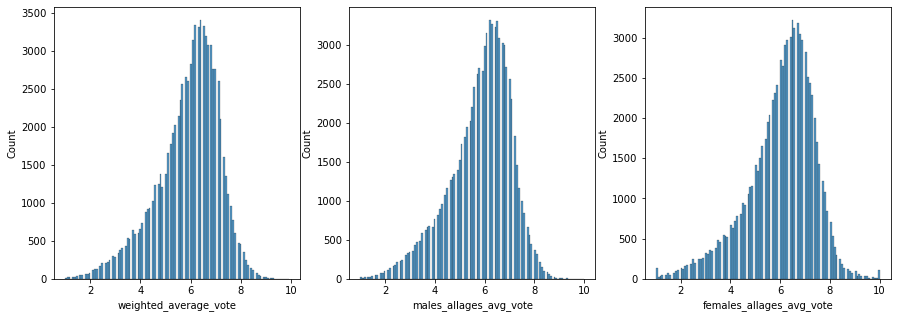

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
sns.histplot(data = ratings, x = 'weighted_average_vote', ax = ax[0])
sns.histplot(data = ratings, x = 'males_allages_avg_vote', ax = ax[1])
sns.histplot(data = ratings, x = 'females_allages_avg_vote', ax = ax[2])